In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset

df=pd.read_excel("F:\\Amrita\\5th semester_2024\\Machine Learning\\Lab-3\\Project Dataset.xlsx")
df


,BMI,4. Age (in years),5. Height (in cms),6. Weight (in kgs),Financial insecurity faced due to lockdown,5. Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?,7. How is home quarantine (unable to go out) impacting you?,8. When did you have more free time?,9. How many days in a week do you practice meditation?,"19. Out of the following, choose 5 tools which you use most often these days.",17. Are you happy with online classes?,18. How would you rate your mental well being ?,17. Average sleeping hours per day,5. Problems faced after attending online classes,2. Posture related problems faced after attending online classes,6. How is online classes impacting your academic performance?,Rate_your_mental_well_being,mentalh_level,to
0,27.887617,45,155.0,67.0,6,Yes,No affect,Before lockdown,1,11,No,5,6 to 8 hours,"Dry eyes, Blurred vision, Computer eye syndrom...","Back pain, Neck pain, Body aches and pains, hgfhj",negative,5,Bad,0.002789
1,26.609713,20,169.0,76.0,1,Yes,No affect,Before lockdown,0,11,Yes,10,4 to 6 hours,"Dry eyes, Headaches, Fatigue, Itchy eyes","Neck pain, Body aches and pains",No effect,10,Good,0.002661
2,20.613131,23,151.0,47.0,3,Yes,No affect,After lockdown,0,11,Yes,5,6 to 8 hours,"Dry eyes, Red eyes, Blurred vision, Headaches,...","Back pain, Neck pain, Body aches and pains",Unaffected,5,Bad,0.002061
3,21.224490,19,175.0,65.0,2,Yes,Negative impact,After lockdown,0,12,No,7,8 to 10 hours,"Blurred vision, Fatigue, Itchy eyes, Eye strai...","Back pain, Neck pain, Rounded shoulders, Body ...",poor performance,7,Good,0.002122
4,17.959184,20,175.0,55.0,8,Yes,Negative impact,Before lockdown,0,17,No,4,4 to 6 hours,Red eyes,Neck pain,Badly,4,Bad,0.001796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,17.474717,36,164.0,47.0,8,No,Negative impact,Unchanged,0,5,No,5,6 to 8 hours,"Dry eyes, Headaches, Sensitivity of light",Neck pain,I attended less classes because of covid-19 an...,5,Bad,0.001747
185,16.528926,16,165.0,45.0,5,Yes,No affect,Unchanged,0,8,No,7,6 to 8 hours,"Dry eyes, Red eyes, Headaches, Itchy eyes, Eye...","Rounded shoulders, Head that either leans forw...",Worsening,7,Good,0.001653
186,22.640865,37,153.0,53.0,4,Yes,Negative impact,After lockdown,3,12,Yes,8,8 to 10 hours,"Dry eyes, Blurred vision, Sensitivity of light",Comfortable,Improved concentration,8,Good,0.002264
187,20.811655,19,155.0,50.0,1,Yes,Negative impact,Unchanged,0,16,No,6,6 to 8 hours,"Dry eyes, Red eyes, Blurred vision, Headaches,...","Back pain, Neck pain, Rounded shoulders, Bent ...",Less efficiency,6,Good,0.002081


In [39]:
from optparse import Values
from sklearn.model_selection import train_test_split
X= df.iloc[:, 1:2].values
y= df.iloc[:, 3:4].values
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3)


In [40]:
LR=LinearRegression()
LR.fit(X_train,Y_train)
predict_x_train=LR.predict(X_train)
predict_x_test=LR.predict(X_test)

#### Trained Data Scores

In [41]:
MSE=mean_squared_error(Y_train,predict_x_train)
MAPE=mean_absolute_percentage_error(Y_train,predict_x_train)
RMSE=np.sqrt(MSE)
R2=r2_score(Y_train,predict_x_train)
print('The MSE of trained data : ', round(MSE,4))
print('The MAPE of trained data : ', round(MAPE,4))
print('The RMSE of trained data : ', round(RMSE,4))
print('The R2_Score of trained data : ', round(R2,4))


The MSE of trained data :  205.0694
The MAPE of trained data :  0.2016
The RMSE of trained data :  14.3202
The R2_Score of trained data :  0.1539


#### Test Data Scores

In [42]:
MSE=mean_squared_error(Y_test,predict_x_test)
MAPE=mean_absolute_percentage_error(Y_test,predict_x_test)
RMSE=np.sqrt(MSE)
R2=r2_score(Y_test,predict_x_test)
print('The MSE of trained data : ', round(MSE,4))
print('The MAPE of trained data : ', round(MAPE,4))
print('The RMSE of trained data : ', round(RMSE,4))
print('The R2_Score of trained data : ', round(R2,4))


The MSE of trained data :  146.7431
The MAPE of trained data :  0.1549
The RMSE of trained data :  12.1138
The R2_Score of trained data :  0.0731


In [43]:
from optparse import Values
from sklearn.model_selection import train_test_split
X1= df.iloc[:, [1,2]].values
y1= df.iloc[:, 3:4].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,y1, test_size=0.3)


In [44]:
LR=LinearRegression()
LR.fit(X1_train,Y1_train)
predict_x1_train=LR.predict(X1_train)
predict_x1_test=LR.predict(X1_test)

In [45]:
MSE=mean_squared_error(Y1_train,predict_x1_train)
MAPE=mean_absolute_percentage_error(Y1_train,predict_x1_train)
RMSE=np.sqrt(MSE)
R2=r2_score(Y1_train,predict_x1_train)
print('The MSE of trained data : ', round(MSE,4))
print('The MAPE of trained data : ', round(MAPE,4))
print('The RMSE of trained data : ', round(RMSE,4))
print('The R2_Score of trained data : ', round(R2,4))


The MSE of trained data :  158.8259
The MAPE of trained data :  0.174
The RMSE of trained data :  12.6026
The R2_Score of trained data :  0.2503


In [46]:
MSE=mean_squared_error(Y1_test,predict_x1_test)
MAPE=mean_absolute_percentage_error(Y1_test,predict_x1_test)
RMSE=np.sqrt(MSE)
R2=r2_score(Y1_test,predict_x1_test)
print('The MSE of trained data : ', round(MSE,4))
print('The MAPE of trained data : ', round(MAPE,4))
print('The RMSE of trained data : ', round(RMSE,4))
print('The R2_Score of trained data : ', round(R2,4))


The MSE of trained data :  188.7993
The MAPE of trained data :  0.1715
The RMSE of trained data :  13.7404
The R2_Score of trained data :  0.1494


In [54]:
X_clustering = df.iloc[:,[1,2,3]]

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_clustering)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Labels : ",labels)
print("Cluster Centers : ",centers)

Cluster Labels :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Cluster Centers :  [[ 20.97297297 166.23138793  61.8122272 ]
 [ 18.5         17.55        53.25      ]]


In [56]:
# Silhouette Score
Silhouette = silhouette_score(X_clustering, labels)

# Calinski-Harabasz Score
CH_Score = calinski_harabasz_score(X_clustering, labels)

# Davies-Bouldin Score
DB_Index = davies_bouldin_score(X_clustering, labels)

# Print the results
print("Silhouette Score : ", round(Silhouette,5))
print("Calinski-Harabasz Score : ",round(CH_Score,5))
print("Davies-Bouldin Index : ",round(DB_Index,5))

Silhouette Score :  0.82865
Calinski-Harabasz Score :  202.4719
Davies-Bouldin Index :  0.25898


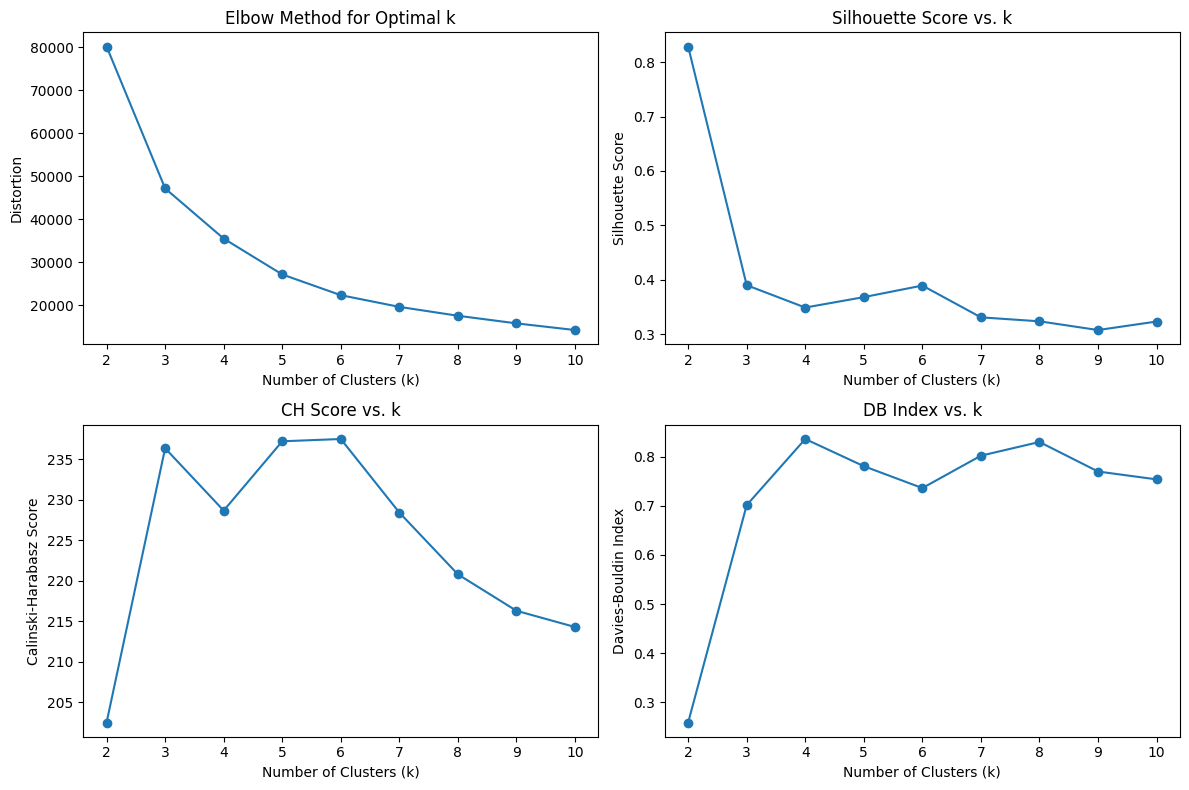

In [57]:
distortions = []
silhouette_scores = []
ch_scores = []
db_indices = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_clustering)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_clustering, kmeans.labels_))
    db_indices.append(davies_bouldin_score(X_clustering, kmeans.labels_))

# Plot the metrics against k
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')

plt.subplot(2, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(2, 2, 3)
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('CH Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(2, 2, 4)
plt.plot(range(2, 11), db_indices, marker='o')
plt.title('DB Index vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()